# Final Evaluation of the models

In [1]:
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

import sys
sys.path.insert(0, "../Src/")
import loadData
import visualization as viz

%autosave 5

Autosaving every 5 seconds


Autosaving every 5 seconds


In [2]:
_, test = loadData.loadData('MSFT')
date = test['ds']
validation = test['y']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Autoregression

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


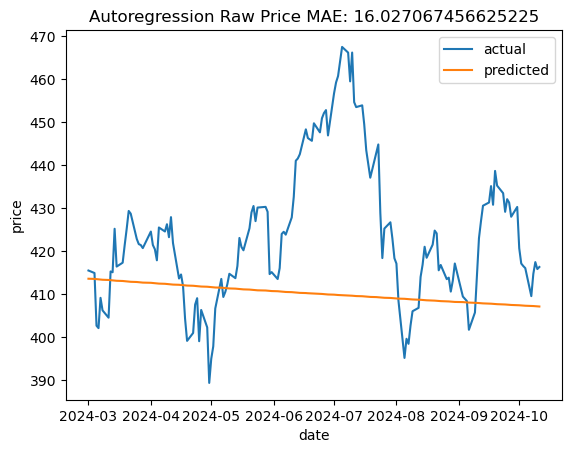

Autoregression Raw Price MAE: 16.027067456625225


<Figure size 640x480 with 0 Axes>

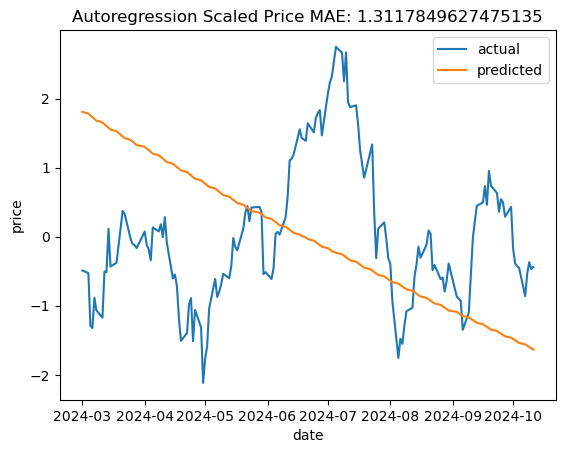

Autoregression Scaled Price MAE: 1.3117849627475135


<Figure size 640x480 with 0 Axes>

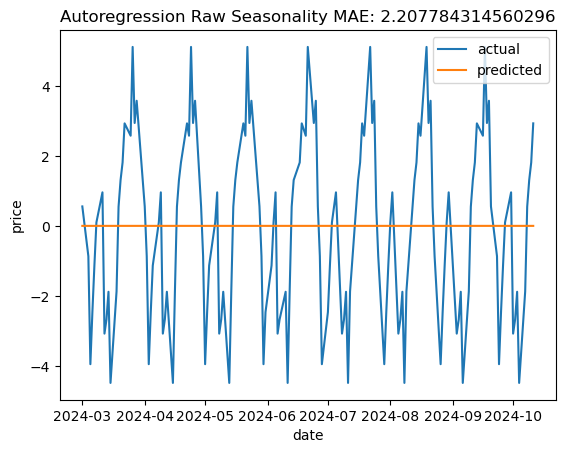

Autoregression Raw Seasonality MAE: 2.207784314560296


<Figure size 640x480 with 0 Axes>

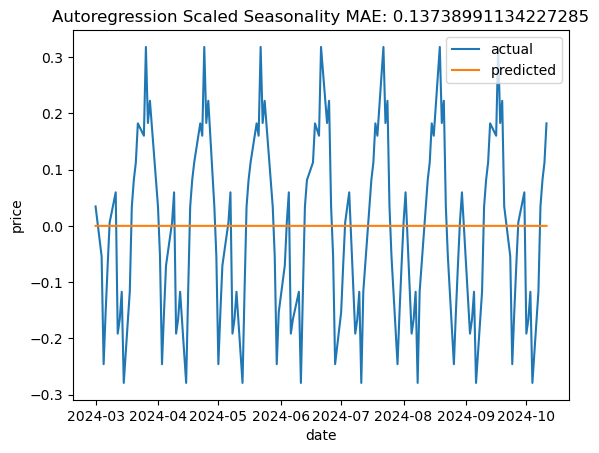

Autoregression Scaled Seasonality MAE: 0.13738991134227285


<Figure size 640x480 with 0 Axes>

In [3]:
viz.compareSimplePickleModel('autoRegression',date,validation, 'Autoregression')

## ARIMA

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


/Users/garysimmons/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


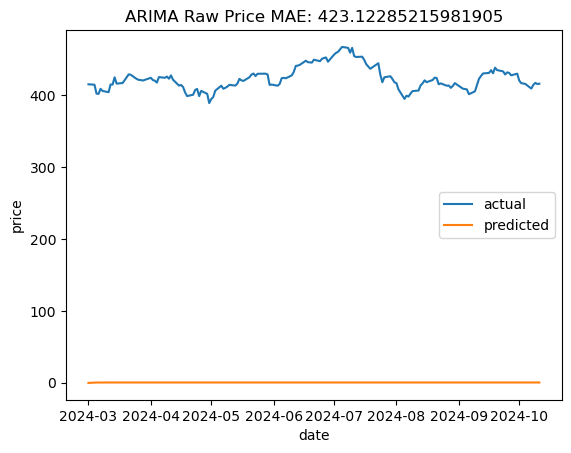

ARIMA Raw Price MAE: 423.12285215981905


<Figure size 640x480 with 0 Axes>

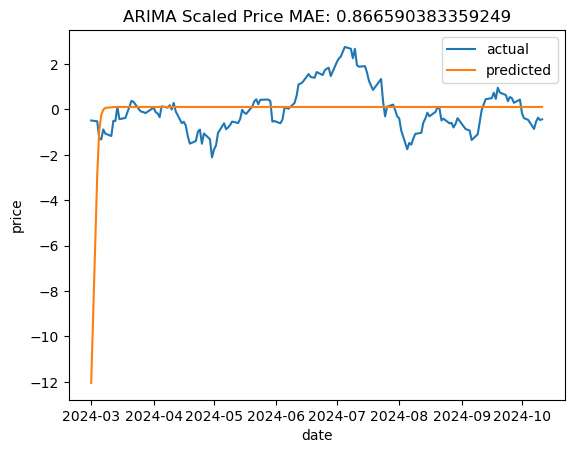

ARIMA Scaled Price MAE: 0.866590383359249


<Figure size 640x480 with 0 Axes>

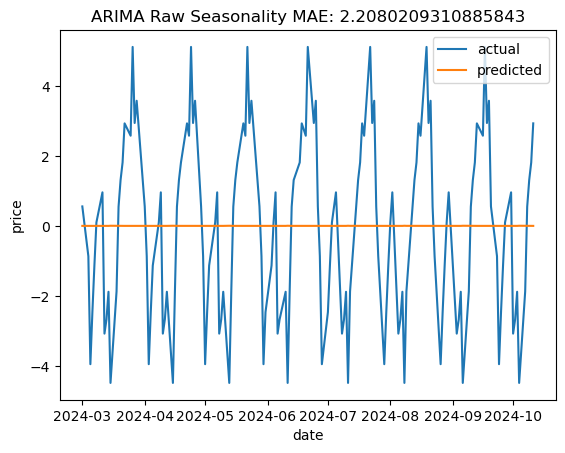

ARIMA Raw Seasonality MAE: 2.2080209310885843


<Figure size 640x480 with 0 Axes>

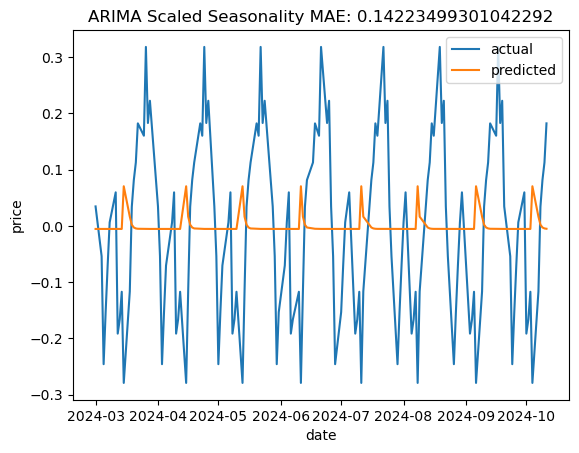

ARIMA Scaled Seasonality MAE: 0.14223499301042292


<Figure size 640x480 with 0 Axes>

In [4]:
viz.compareSimplePickleModel('arima',date, validation, 'ARIMA')

## SARIMA

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


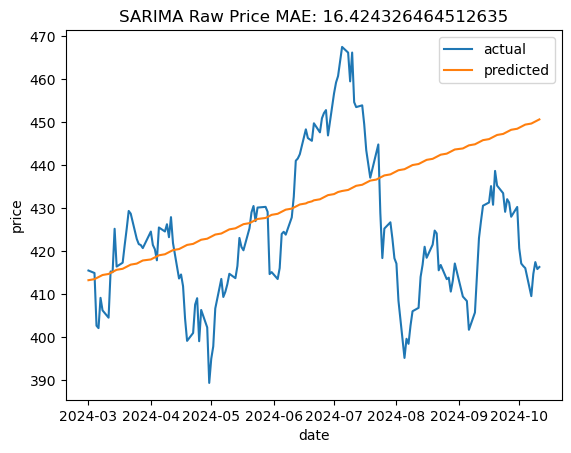

SARIMA Raw Price MAE: 16.424326464512635


<Figure size 640x480 with 0 Axes>

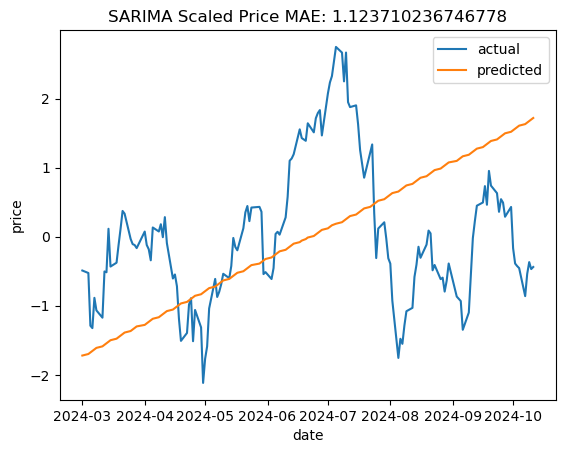

SARIMA Scaled Price MAE: 1.123710236746778


<Figure size 640x480 with 0 Axes>

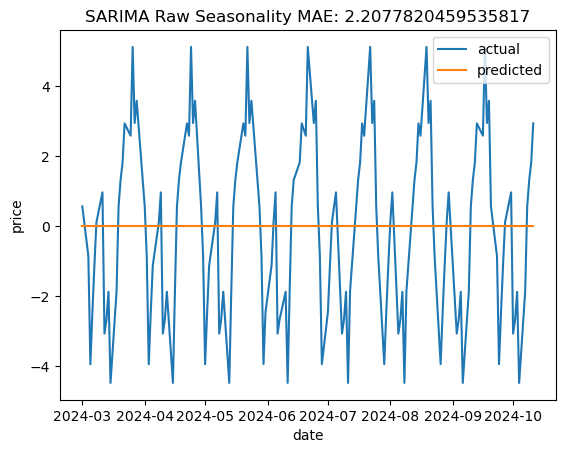

SARIMA Raw Seasonality MAE: 2.2077820459535817


<Figure size 640x480 with 0 Axes>

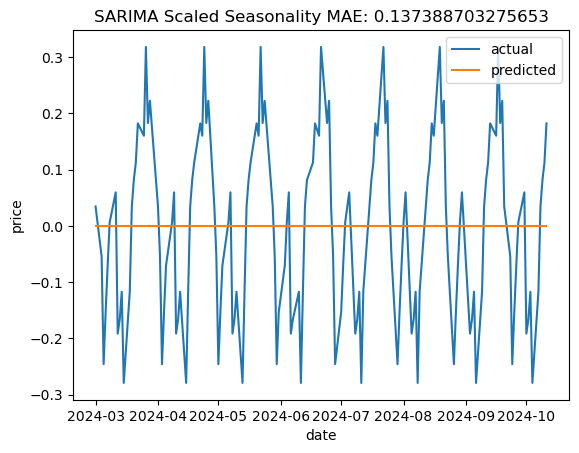

SARIMA Scaled Seasonality MAE: 0.137388703275653


<Figure size 640x480 with 0 Axes>

In [5]:
viz.compareSimplePickleModel('sarima',date,validation, 'SARIMA')

## ExponentialSmoothing

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


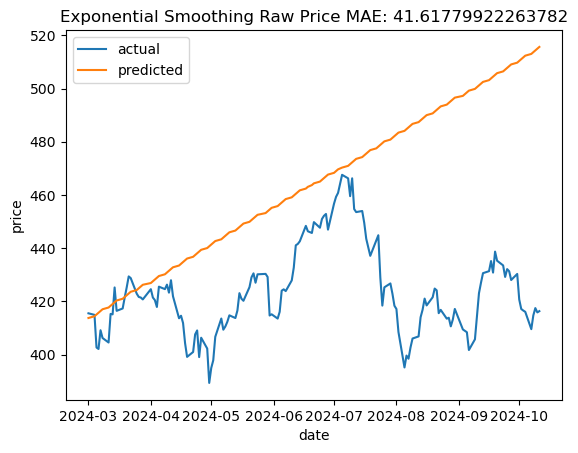

Exponential Smoothing Raw Price MAE: 41.61779922263782


<Figure size 640x480 with 0 Axes>

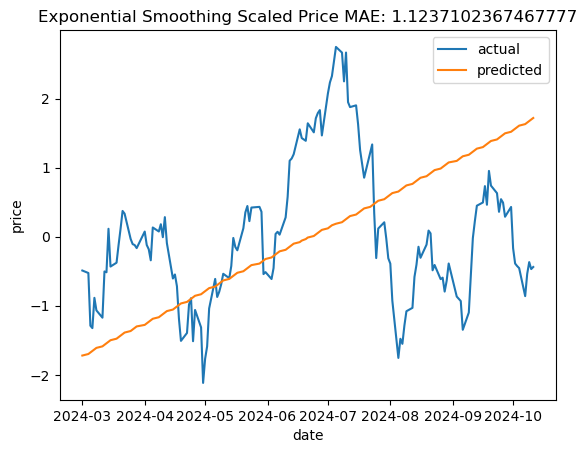

Exponential Smoothing Scaled Price MAE: 1.1237102367467777


<Figure size 640x480 with 0 Axes>

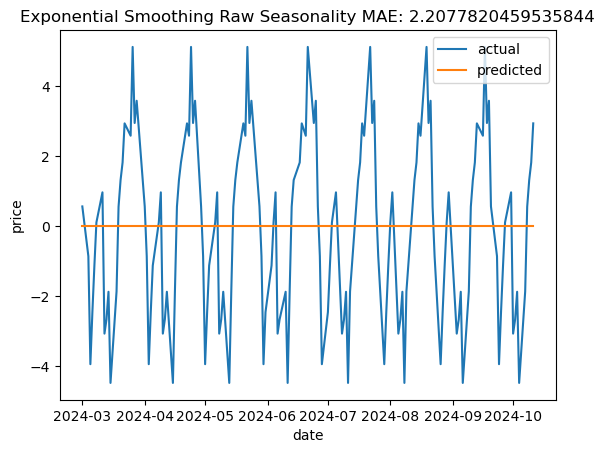

Exponential Smoothing Raw Seasonality MAE: 2.2077820459535844


<Figure size 640x480 with 0 Axes>

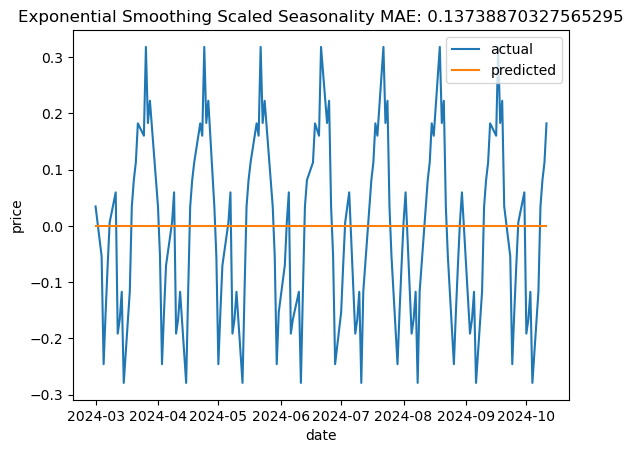

Exponential Smoothing Scaled Seasonality MAE: 0.13738870327565295


<Figure size 640x480 with 0 Axes>

In [6]:
viz.compareSimplePickleModel('ExponentialSmoothing',date,validation, 'Exponential Smoothing')

## Prophet

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


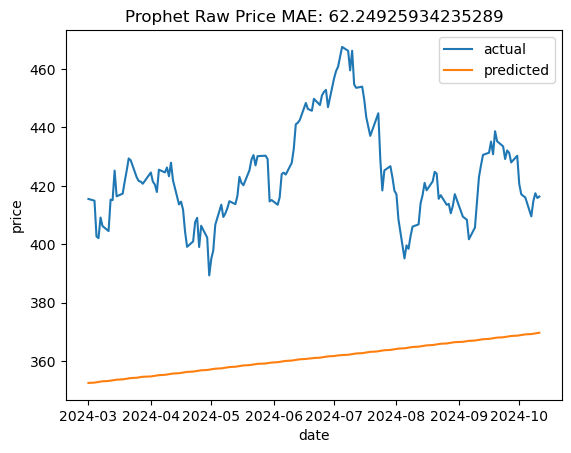

Prophet Raw Price MAE: 62.24925934235289


<Figure size 640x480 with 0 Axes>

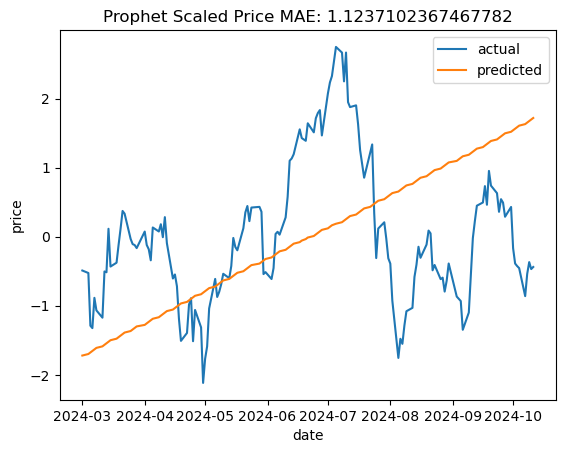

Prophet Scaled Price MAE: 1.1237102367467782


<Figure size 640x480 with 0 Axes>

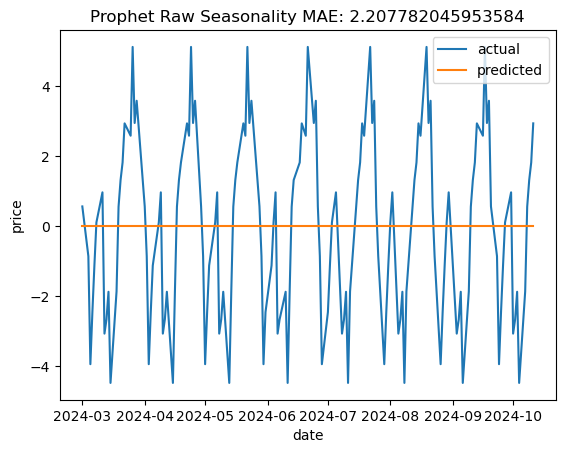

Prophet Raw Seasonality MAE: 2.207782045953584


<Figure size 640x480 with 0 Axes>

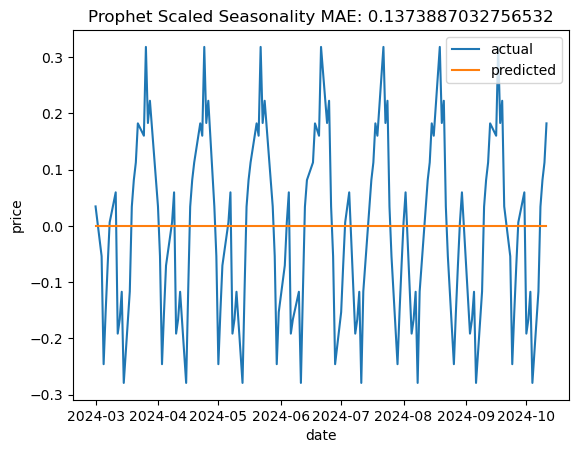

Prophet Scaled Seasonality MAE: 0.1373887032756532


<Figure size 640x480 with 0 Axes>

In [7]:
model = viz.loadModel('prophet')
future = model.make_future_dataframe(periods=test.shape[0], freq='D')
capValue = test['y'].max() * 1.1
future['cap'] = capValue
future['floor'] = 0
forecast = model.predict(future)
forecast = forecast.iloc[-test.shape[0]:]
viz.compare(date,validation,forecast['yhat'],'Prophet')

## LSTM